In [1]:
from IPython.display import Image

# Clustering

Clustering is one of the hardest problems in ML, because:

  - you do not know how many clusters there are
  - it is unclear, which variables to use
  - the scale of the variables is important for similarity

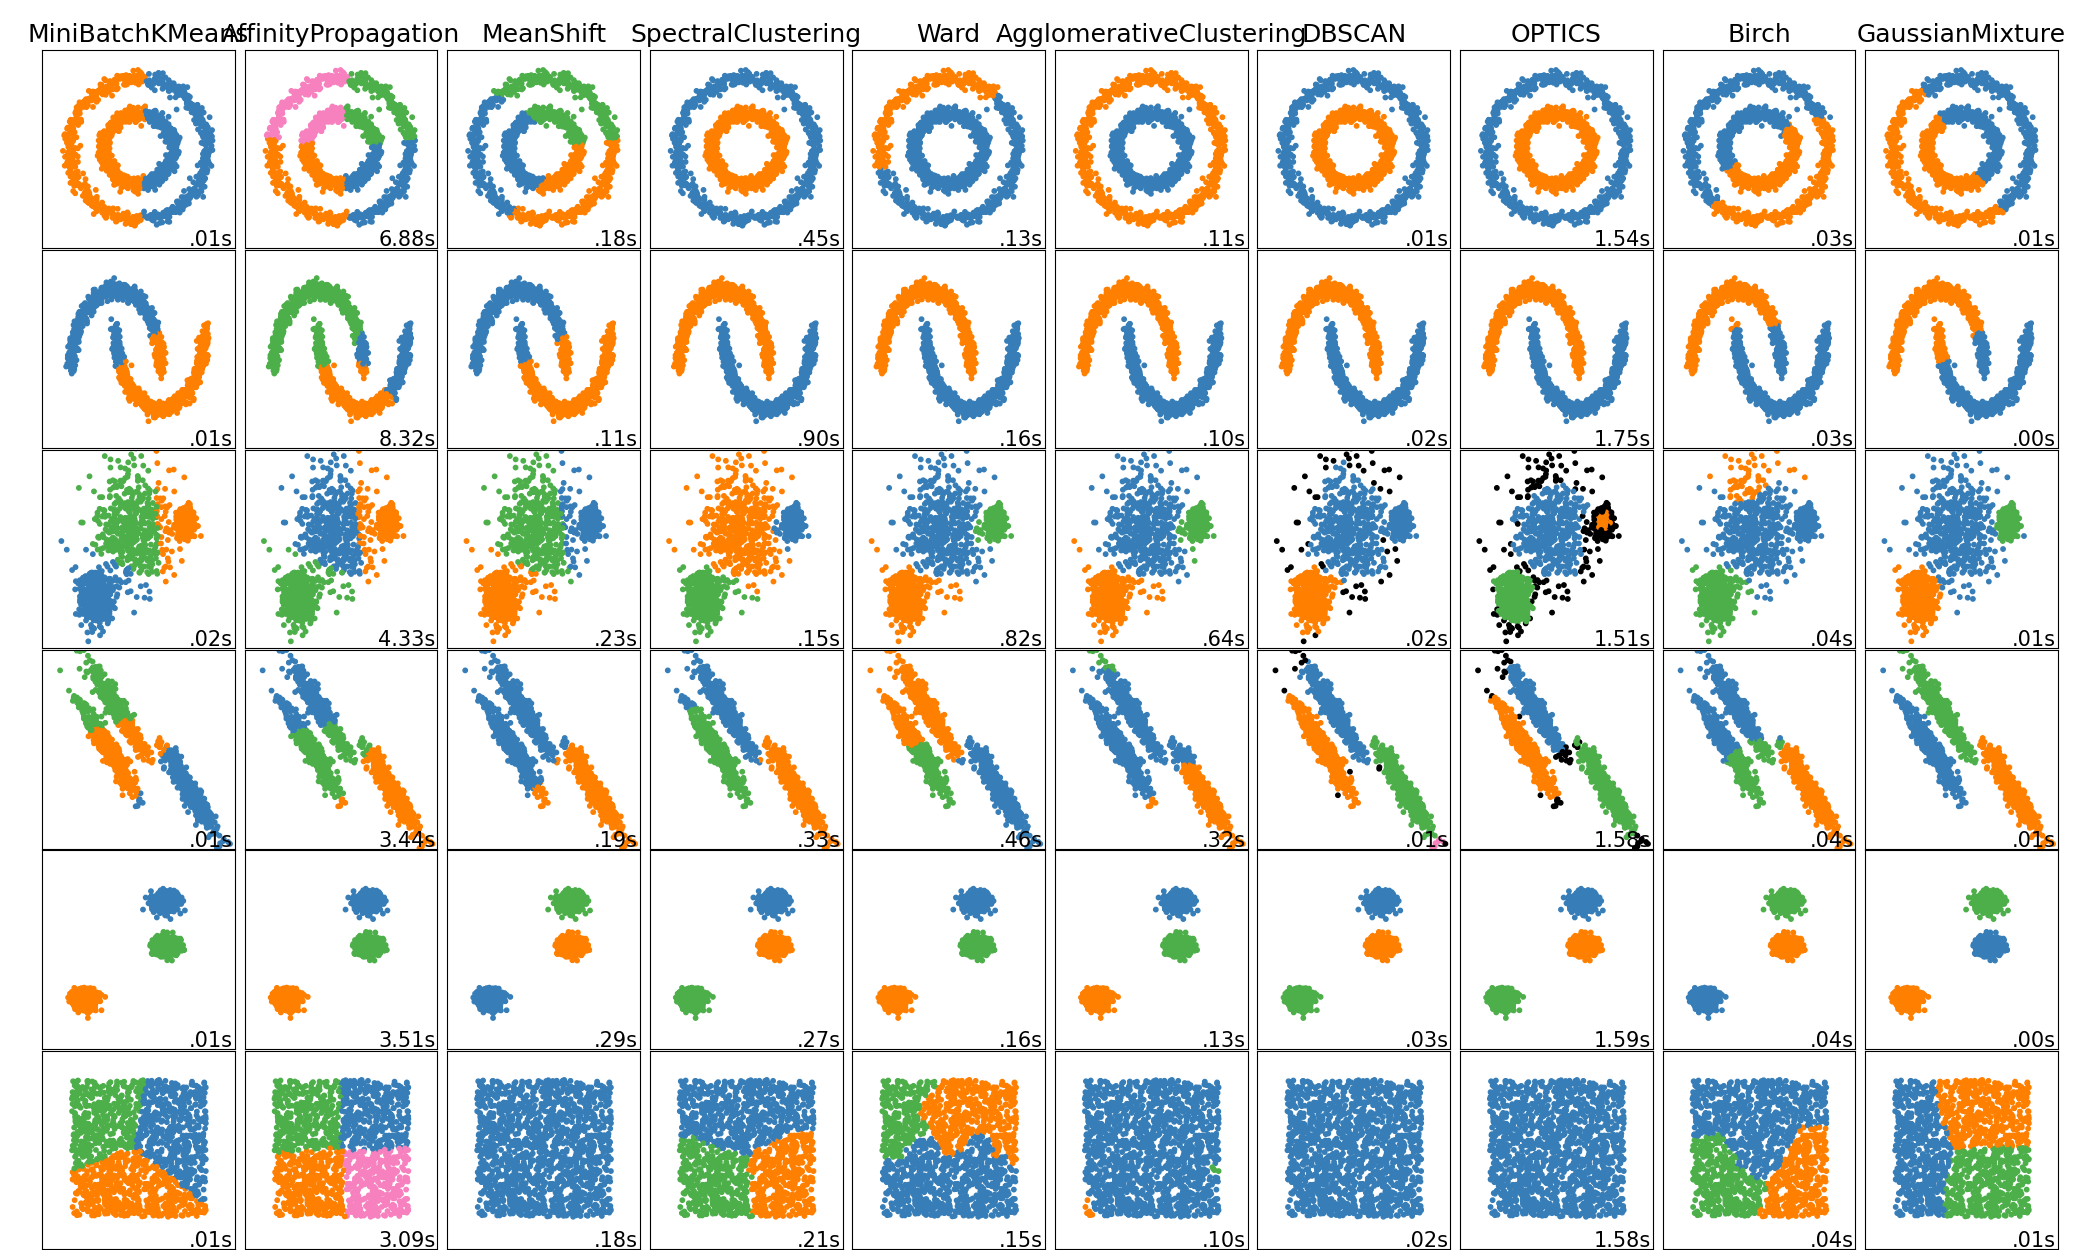

In [2]:
Image("../images/sphx_glr_plot_cluster_comparison_0011.png")

# <img alt="" caption="taken from wikipedia" onmouseover="[taken from here](https://en.wikipedia.org/wiki/DBSCAN)"
# id="bayesian_optimization" src="../images/sphx_glr_plot_cluster_comparison_0011.png" width="720" height="720">

# [The image is taken from the sklearn site](https://scikit-learn.org/stable/modules/clustering.html)

### Spectral clustering
Spectral clustering originates from Graph Theory (Spectral Analysis)
The algorithms works as follows:
1. a connectivity matrix / affinity matrix W is formed. This matrix is symmetric and is n x n, where n is the number of observations. If there is a link between observation i and observation j there is a 1 in the matrix at positions $W_{ij}$ and $W_{ji}$. Alternatively, for the affinity matrix, there is a similarity measure indicating the closeness of two observations.
2. the degree matrix $D$ is formed. It is a diagonal matrix that contains for each observation the number of links (or sum of similarities) to other observations.

3. the laplacian matrix $L$ is formed by $L = D -W$. This matrix has several interesting properties:
  * the smallest eigenvalue is always 0. If all observations are connected (fully connected), there is exactly one eigenvalue that is 0.
  * the corresponding eigenvector is constant.
  * are there $r$ connected components (cluster) in the data and if observations are ordered accordingly, the laplacian has block diagonal form:
\begin{equation*}   
 \begin{bmatrix}
   L_{1} & & \\
   & \ddots & \\
   & & L_{r}
 \end{bmatrix}
\end{equation*} 
   
  * the blocks $L_i$ are proper laplacian matrices on their own. Since each component (cluster) is connected within, $L_i$ has exactly one eigenvalue that is 0. The corresponding eigenvector is constant and is zero for all other components. These eigenvectors hence are indicator vectors for their component. 

Text(0, 0.5, 'Height')

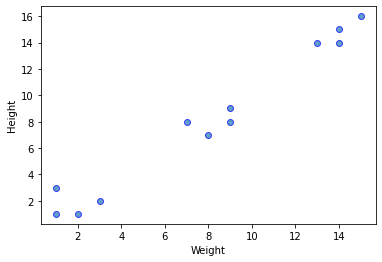

In [3]:
# this simple example is taken from https://towardsdatascience.com/unsupervised-machine-learning-spectral-clustering-algorithm-implemented-from-scratch-in-python-205c87271045
import numpy as np
import matplotlib.pyplot as plt
X = np.array([
    [1, 3], [2, 1], [1, 1],
    [3, 2], [7, 8], [9, 8],
    [9, 9], [8, 7], [13, 14],
    [14, 14], [15, 16], [14, 15]
])
plt.scatter(X[:,0], X[:,1], alpha=0.7, edgecolors='b')
plt.xlabel('Weight')
plt.ylabel('Height')


Next we buid the connectivity matrix $W$ (also called adjacency matrix). We see, it has three connected components (clusters):

In [4]:
from sklearn.metrics import pairwise_distances
W = pairwise_distances(X, metric="euclidean")
vectorizer = np.vectorize(lambda x: 1 if x < 5 else 0)
W = np.vectorize(vectorizer)(W)
print(W)

[[1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1]]


Next we buid the degree matrix $D$ and finally the laplacian as $L = D - W$

In [5]:
#D = np.diag(np.reshape(W.dot(np.ones((W.shape[1], 1))), (W.shape[1],)))
D = np.diag(W.sum(axis=1))
print(D)

[[4 0 0 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 0 0 4]]


In [6]:
L = D - W
print(L)

[[ 3 -1 -1 -1  0  0  0  0  0  0  0  0]
 [-1  3 -1 -1  0  0  0  0  0  0  0  0]
 [-1 -1  3 -1  0  0  0  0  0  0  0  0]
 [-1 -1 -1  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3 -1 -1 -1  0  0  0  0]
 [ 0  0  0  0 -1  3 -1 -1  0  0  0  0]
 [ 0  0  0  0 -1 -1  3 -1  0  0  0  0]
 [ 0  0  0  0 -1 -1 -1  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3 -1 -1 -1]
 [ 0  0  0  0  0  0  0  0 -1  3 -1 -1]
 [ 0  0  0  0  0  0  0  0 -1 -1  3 -1]
 [ 0  0  0  0  0  0  0  0 -1 -1 -1  3]]


Text(0, 0.5, 'eigenvalues')

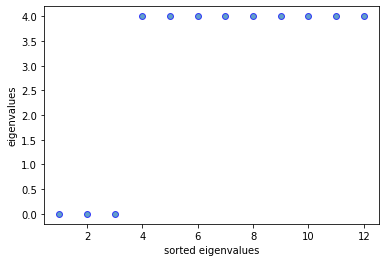

In [7]:
# eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(L)

# sort these based on the eigenvalues
eigenvectors = eigenvectors[:,np.argsort(eigenvalues)]
eigenvalues = eigenvalues[np.argsort(eigenvalues)]
plt.scatter(np.arange(1, W.shape[1]+1), eigenvalues, alpha=0.7, edgecolors='b')
plt.xlabel('sorted eigenvalues')
plt.ylabel('eigenvalues')



In [8]:
print('corresponding eigenvectors')
print(eigenvectors[:, 0:3])

corresponding eigenvectors
[[-0.5  0.   0. ]
 [-0.5  0.   0. ]
 [-0.5  0.   0. ]
 [-0.5  0.   0. ]
 [ 0.  -0.5  0. ]
 [ 0.  -0.5  0. ]
 [ 0.  -0.5  0. ]
 [ 0.  -0.5  0. ]
 [ 0.   0.  -0.5]
 [ 0.   0.  -0.5]
 [ 0.   0.  -0.5]
 [ 0.   0.  -0.5]]


This is a somewhat contrieved example but it illustrates the principal idea. 
For normal data that is not as clear as in our example, the spectral embedding matrix (eigenvectors belonging to the $s$ smallest eigenvalues) can be clustered by k-means. Another possibility is to start with the embedding matrix as a indicator matrix and optimize it as to maximize the in-component connectivity (association) and minimize the between component connectivity (cuts)(see https://www1.icsi.berkeley.edu/~stellayu/publication/doc/2003kwayICCV.pdf). In the python sklearn library the last method is called 'discretize'.

## Example: 20 newsgroups

We are going to demonstrate the virtues of spectral clustering on a text-clustering example. The data is a common dataset with nearly balanced classes. Hence, k-means should also be appropriate.



Here is one example:

```text
From: sigma@rahul.net (Kevin Martin)
Subject: Re: Stay Away from MAG Innovision!!!
Nntp-Posting-Host: bolero
Organization: a2i network
Lines: 10

In <16BB58B33.D1SAR@VM1.CC.UAKRON.EDU> D1SAR@VM1.CC.UAKRON.EDU (Steve Rimar) writes:
>My Mag MX15F works fine....................

Mine was beautiful for a year and a half.  Then it went <foomp>.  I bought
a ViewSonic 6FS instead.  Another great monitor, IMHO.

-- 
Kevin Martin
sigma@rahul.net
"I gotta get me another hat."
```

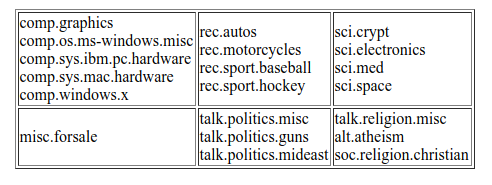

In [20]:
Image("../images/20_newsgroups.png")

#<img alt="taken from homepage of 20 newsgroups" caption="The different categories of the newsgroup posts" id="20_newsgroups" src="../images/20_newsgroups.png">

## Organization
1. We build tf-idf vectors since we are following the bag-of-words approach
2. For building the adjacency/connectivity/affinity matrix we have several possibilities. We will discuss the most relevant ones
3. we compare different cluster solution and evaluate their results on the 20 different target labels of the newsgroup posts. For doing this, we introduce the the *adusted rand index*.
4. Since we are always curious we verify if we could have guessed the right number of clusters from the eigenvalue criterion as discussed above

In [1]:
#%reload_ext autoreload
#%autoreload 2
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn import metrics
import nmslib
dataset = fetch_20newsgroups(subset='all', shuffle=True, download_if_missing=True)
# http://qwone.com/~jason/20Newsgroups/

np.random.seed(123)
texts = dataset.data # Extract text
target = dataset.target # Extract target
display(len(texts))

# Tf-idf
refresher:

$w_{i,j} = \text{tf}_{i,j} \cdot \log\frac{N}{\text{df}_i}$  
with  
$\text{tf}_{i,j}$ is the frequency of term i in document j  
$\text{df}_i$ is the number of documents containing term i  

Since we want to cluster newsgroup posts we are more interested in words that are nearly unique to certain groups. By setting max_df = 0.3 we ensure that only words are considered that are not too common, i.e. only in 30% of all posts. By contrast, words that are very seldom but are concerned with special topics discussed in the groups are most important for our endeavor. Hence, there is no limit for min_df.  
We tell the vectorizer to remove common english stop words.  
By default the vectors returned are normed, i.e. they all have length 1. This is important when we compute the cosine similarity between the vectors.

## Rand Index
The rand index is a measure of how well two partitions of a set of objects coincide:

\begin{equation*}
R=\frac{a + b}{a + b + c + d} = \frac{a + b}{{n \choose2}},
\end{equation*}

where  
$a$ is the number of pairs of elements that are in the same subset for both partitions  
$b$ is the number of pairs of elements that are in different subsets for both partitions  
$c$ is the number of pairs of elements that are in the same subset for the first partition but not for the second   
$d$ is the number of pairs of elements that are in the different subsets for the first partition but in the same subset for the second partition  

The Rand index is the percentage of consistent/congruent decisions for the two partitions.

In [4]:
# norm='l2' is default
vectorizer = TfidfVectorizer(stop_words='english', max_df = 0.3)
X = vectorizer.fit_transform(texts)

print(f'{X.shape[0]}, {X.shape[1]}')


18846, 173438


## Connectivity / adjacency / affinity matrix
We have several possibilities to express the similarity / connectedness between observations. Some of common ones:  
1. The $\epsilon$ neighborhood graph: all observations whose pairwise distance is less than $\epsilon$ are connected. (This was used in our contrieved example)
2. k-nearest neighborhood graph: for every observation, the k-nearest neighbors get connected. Since the nearest neighbors relationsship is not symmetric, we have to adjust the resulting adjacency matrix: $W_{symm} = 0.5 \cdot W + W^{T}$ 
3. fully connected graph: all observations are connected with weights equal to the respective similarity. Possible choices here are
  * the gaussian kernel: $\exp^{-(x_i - x_j)^2/(2\sigma^2)}$; In sklearn the term $1/(2\sigma^2) = \gamma$; the gaussian kernel is also called radial basis function kernel (rbf) or euclidean kernel. For identical vectors $\exp^{0} = 1$; For dissimilar vectors the term assymptotically approaches 0.
  * the cosine kernel: $\frac{x_i \cdot x_j^T}{||x_i|| ||x_j||}$; here $||x_i||$ is the norm (length) of vector $x_i$, normalizing the vector to length 1. When the vectors are already normalized, the cosine similarity simplifies to $x_i \cdot x_j^T$. This is the linear kernel. The cosine measures the angle between two vectors. For identical vectors, the cosine is 1, for orthogonal vectors it is 0.
  
# our choice
Since we deal with very long and sparse vectors, euclidean distance is not a good choice. This has to do with the *curse of dimensionality* (search for it). Typically, for these long tf-idf vectors cosine similarity is used. For bigger data sets, I can not see any reason why we should compute the similarities for all points in the set. Probably, it is sufficient to consider only th $k$ nearest neighbors of each point. This allows us to use sparse matrices, that are far more memory efficient. The sklearn spectral clustering implementation can deal with those matrices. As we will see, this simplification further reduces noise in the data and encourages better overall solutions.

# Approximate nearest neighbors
Computing all mutual distances between the 18846 posts can be very time and memory consuming. Theoretically, we only have to compute the triangular matrix minus the diagonal (distance matrices are symmetrical):
$0.5 \cdot 18846^2 - 18846/2 = 177576435$ mutual distances. A clever idea here, is to compute only the k nearest neighbors of each post and treat all other posts as maximal distant. There are a lot of algorithms around for computing nearest neighbors, the most efficient relying on kd-trees.
However, there are also approximate nearest neighbor algorithms that are nearly 100% accurate and are even faster than kd-trees. One of those is the hnsw-algorithm as implemented in the python nmslib (an api for the underlying c++ code). <br>
https://github.com/erikbern/ann-benchmarks

In [16]:
# see discussions about 'curse of dimensionality'; to be safe, we opt for cosine-similarity
# since we want to be most efficient in everything we do, we use sparse matrices and vectors
index = nmslib.init(method='hnsw', space='cosinesimil_sparse', data_type=nmslib.DataType.SPARSE_VECTOR)
index.addDataPointBatch(X)
index_time_params = {'post':2}
index.createIndex(index_time_params, print_progress=True)

# now we can query the index
# By computing distances for the k=1000 nearest neighbors, we have to store 1000 * 18846 = 18846000
# distances; but compared to the triangular matrix approach discussed above, we still save 158730435
# entries in our matrix.

nn = 1000
neighbors = index.knnQueryBatch(X, k=nn, num_threads=4)

In [17]:
neighbors[0:3]

[(array([    0, 18553, 11184, 16876, 11946, 16873, 11485,  2729, 11312,
          6760,  7949, 17776, 13476,  3309,  2867,  8311, 12784,  1154,
          7476,  7330,  8755, 13588, 13897, 17132,  6839,  3787,  3042,
           629, 15810, 18704,   333,  3925,  9968, 16990,  8496,  2361,
          6424, 15497,  9822, 11135, 13042, 18583,  5707, 15814,  7020,
          7142, 11961, 11029,  1803, 11246, 10832, 14097, 10344, 15032,
          7931, 13927,   458, 17853, 16067, 14836,  4506, 12084,  2853,
          4459, 15130, 17520, 16621, 10478, 13146, 13207,  8265, 15036,
         12512,  7803, 17900,  6566, 17040,  3349,     7, 13893,  2967,
         14123, 12769, 17020, 18590,  1898, 10391, 14628,  1469, 13250,
          1431, 16369,  3068, 10040, 11045, 10974, 15167,  9902,  6613,
           959], dtype=int32),
  array([0.        , 0.63908607, 0.669317  , 0.6755365 , 0.6795682 ,
         0.6914151 , 0.70722437, 0.7155305 , 0.7231293 , 0.7415422 ,
         0.7510953 , 0.76321185, 0.7724

Next, we build our affinity matrix. Sparse matrices only store the indices and the data for entries in the matrix that acutally contain data. 

In [18]:
from scipy.sparse import csc_matrix
# next we construct a sparse matrix with the distances as measured by cosine similarity
col = np.array([i for n in neighbors for i in n[0].tolist()]) # column indices of nearest neighbors
row = np.repeat(np.arange(0, len(neighbors)), np.array([len(n[0]) for n in neighbors])) # the row index for each nearest neighbor
# data = np.array([i for n in neighbors for i in n[1].tolist()]) # the similarities
data = np.array([1 for n in neighbors for i in n[1].tolist()]) # the similarities

# btw, if you do not understand what's going on in the list part of the construction of the col and
# the data variable above, I stronly recommend to have a look at *list comprehension*; 
# list comprehension is a super fast way to get things done in python

affinity = csc_matrix((data, (row, col)), shape = (X.shape[0], X.shape[0]))

In [19]:
# n_clusters = 20 because we know, that there are 20 different newsgroups
# n_components = 21; this is cheated because it should normally be set to the same number as
#                the n_clusters, but 21 yielded a better solution
# assign_labels = 'discretize' defines how the clusters are found within the 
#                 embedding matrix (matrix composed of eigenvectors belonging to the n_components 
#                 smallest eigenvalues). As discussed above, 'discretize' maximizes the 
#                 in-component connectivity and minimizes the between-component connectivity
# affinity = 'precomputed' indicates that the affinity matrix is provided by the user
# eigen_solver = 'amg' assumes the python-package pyamg is installed. It is by far the fastest
#                way the eigenvalue decomposition                
#
solution = SpectralClustering(n_clusters = 20, n_components = 21, assign_labels='discretize',\
                              affinity = 'precomputed',\
                              eigen_solver='amg').fit(0.5 * (affinity + affinity.T))
metrics.adjusted_rand_score(solution.labels_, target)

0.3312465898113292

So, let's see what our nearest-neighbor trick was good for. In the next cell we compute the spectral clustering for the whole tf-idf matrix and leave it to sklearn to compute all cosine similarities. As discussed above, since the tf-idf vectors are by default normalized, we can use the 'linear' kernel instead of the 'cosine' kernel. This is faster because the additional steps of getting the norms and dividing is not needed.

In [15]:
# linear kernel instead of cosine_similarity if tf-idf vectors are already normalized
solution = SpectralClustering(n_clusters=20, n_components = 21, assign_labels='discretize',\
                              affinity='linear',eigen_solver='amg').fit(X)
metrics.adjusted_rand_score(solution.labels_, target)

0.275483821009973

What would the solution be like if we would have used ordinary euclidean distance (=rbf kernel=gaussian kernel)?
gamma ($\gamma = \frac{1}{2\sigma^2}$) defines the size of the neighborhood and is similar to the choice of the parameter $k$ in the approx. k-nearest neighbor algorithm we used in the construction of our affinity matrix.

In [4]:
solution = SpectralClustering(n_clusters=20, n_components = 21, assign_labels='discretize',\
                              affinity='rbf',eigen_solver='amg',\
                              gamma = 0.7).fit(X)
metrics.adjusted_rand_score(solution.labels_, target)

0.17161380707083057

How is ordinary k-means performing? Clustering is done on the tf-idf vectors.

In [5]:
solutionKMeans = KMeans(n_clusters=20, init='k-means++', max_iter=100, n_init=1).fit(X)
metrics.adjusted_rand_score(solutionKMeans.labels_, target)

0.1760642244041933

Could we have guessed the right number of clusters from the eigenvalues of the laplacian as suggested in all tutorials about spectral clustering?

In [21]:
from scipy.sparse.csgraph import laplacian as csgraph_laplacian
from sklearn.utils import check_array
from sklearn.utils import check_random_state
from sklearn.utils.fixes import lobpcg
from sklearn.manifold._spectral_embedding import _set_diag
from scipy import sparse
from pyamg import smoothed_aggregation_solver
import matplotlib.pyplot as plt


In [ ]:

norm_laplacian = True
random_state = check_random_state(1234)

connectivity =0.5 * (affinity + affinity.T)
laplacian, dd = csgraph_laplacian(connectivity, normed=norm_laplacian, return_diag=True)
laplacian = check_array(laplacian, dtype=np.float64, accept_sparse=True)
                                
laplacian = _set_diag(laplacian, 1, norm_laplacian)
diag_shift = 1e-5 * sparse.eye(laplacian.shape[0])
laplacian += diag_shift
ml = smoothed_aggregation_solver(check_array(laplacian, 'csr'))
laplacian -= diag_shift
n_components = laplacian.shape[0]
M = ml.aspreconditioner()
X = random_state.rand(laplacian.shape[0], n_components + 1)
X[:, 0] = dd.ravel()
eigs, diffusion_map = lobpcg(laplacian, X, M=M, tol=1.e-5, largest=False)
plt.scatter(np.arange(len(eigs)), eigs)
plt.grid()
plt.show()


In [ ]:
plt.scatter(np.arange(len(eigs[0:255])), eigs[0:255])
plt.plot([19]* 2, [eigs[19]] * 2, 'ro')
plt.grid()

# DBSCAN
Density-based clustering of applications with noise.

DBSCAN has the concept of __core point__, __border point__ and __outlier__. A data point is considered a core point if there are sufficient (__*minPts*__) data points in its vicinity of radius __*eps*__. Border points are those points that are connected to core points but themselves have not enough data point in their neighborhood. Outliers are the points that are not connected to a core points. 

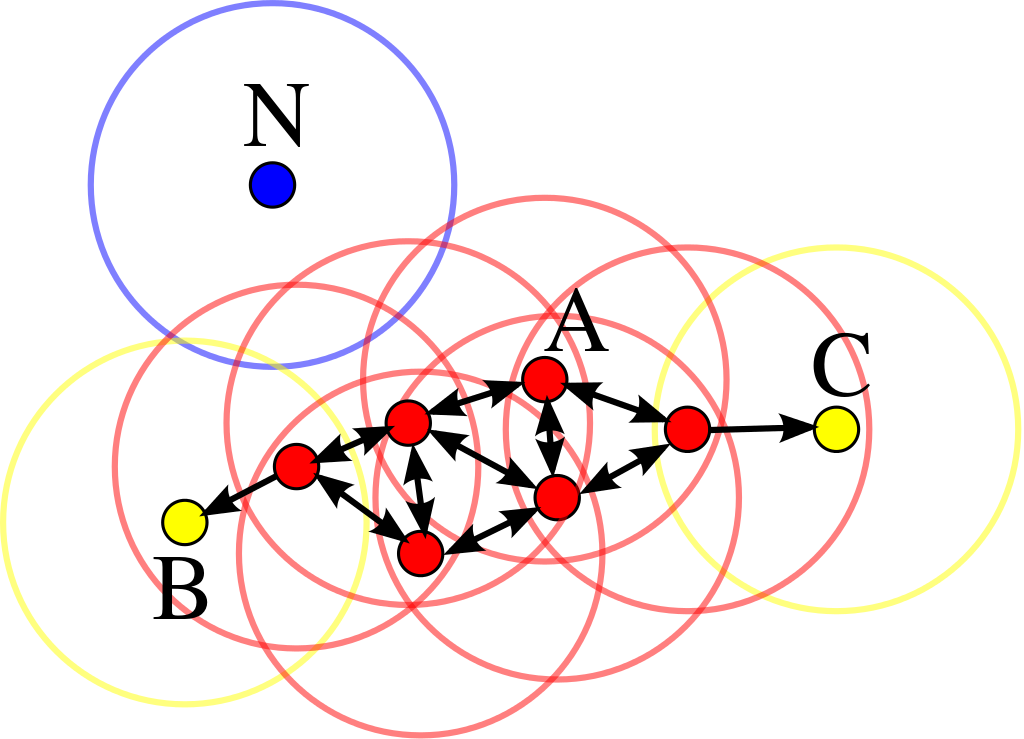

In [22]:
Image("../images/1024px-DBSCAN-Illustration.svg.png", width=640, height=640)

# <img alt="" caption="taken from wikipedia" onmouseover="[taken from here](https://en.wikipedia.org/wiki/DBSCAN)"
# id="bayesian_optimization" src="../images/1024px-DBSCAN-Illustration.svg.png" width="320" height="320">

[The image is taken from wikipedia](https://en.wikipedia.org/wiki/DBSCAN)
* red points (e.g. point A) are __core points__
* yellow points (e.g. points B, c) are __border points__
* the blue point (N) is an __outlier__

<br>
A starting point is selected by random and its neighborhood is scanned. Then this is done for all points in the neighborhood and so on. In the next step the starting point is choosen among the points not visited previously until all points were visited.<br>
Core points are connected to other core-points and form clusters.

In [3]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.5, min_samples=14, metric='cosine', n_jobs=-1)
clusters = db.fit(X)


In [4]:
np.unique(clusters.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20])

In [5]:
metrics.adjusted_rand_score(clusters.labels_, target)

8.75031255964891e-05